In [5]:
% load_ext autoreload
% autoreload 2

import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.datasets.synthetic_multivariate_dataset import SyntheticMultivariateDataset

## Manually test functional depenencies in dimensions

In [8]:
def noised(x, strength=1):
    return x + np.random.random(np.shape(x)) * strength - strength / 2

def get_random_curve(length, amplitude, length_randomness=10, amplitude_randomness=1):
    new_length = int(noised(length, length_randomness))
    new_amplitude = noised(amplitude, amplitude_randomness)
    return get_curve(new_length, new_amplitude)

def get_curve(length, amplitude):
    curve = lambda t: amplitude * (np.sin(t)/2 + 0.5)
    from_ = 1.5 * np.pi
    to_ = 3.5 * np.pi
    return np.array([curve(t) for t in np.linspace(from_, to_, length)])

In [ ]:
def dim2(curve_values, anomalous, pollution=0.5):
    create_anomaly = anomalous and np.random.choice([0, 1], p=[1-pollution, pollution])
    if create_anomaly:
        return True, curve_values * noised(4)
    else:
        return False, curve_values

In [11]:
def generate_data(T=1000, normal=lambda x: x * 2, anomaly=lambda x: x * noised(4), anomalous=False, pollution=0.5):
    # T: amount of timestamps
    pause = lambda: 5 + np.random.randint(70)  # Function for returning a pause interval
    mean_curve_length = 40
    mean_curve_amplitude = 1
    dim2 = lambda x: x * 2
    anomalous_dim2 = lambda x: x * noised(4)
    noise = 0.1

    values = np.zeros((T, 2))
    labels = np.zeros(T)
    pos = 10

    values[:pos] = noised(values[:pos], noise)
    while pos < T - mean_curve_length - 20:
        curve = get_random_curve(mean_curve_length, mean_curve_amplitude)
        create_anomaly = anomalous and np.random.choice([0, 1], p=[1-pollution, pollution])
        values[pos:pos+len(curve), 0] = noised(curve, noise)
        values[pos:pos+len(curve), 1] = noised(dim2(curve, anomalous, pollution) if create_anomaly else dim2(curve), noise)
        if create_anomaly:
            margin = len(curve) // 6
            labels[pos+margin:pos+len(curve)-margin] += 1
        pos += len(curve)
        pause_length = pause()
        values[pos:pos+pause_length] = noised(values[pos:pos+pause_length], noise)
        pos += pause_length
    values[pos:] = noised(values[pos:], noise)
    return values, labels

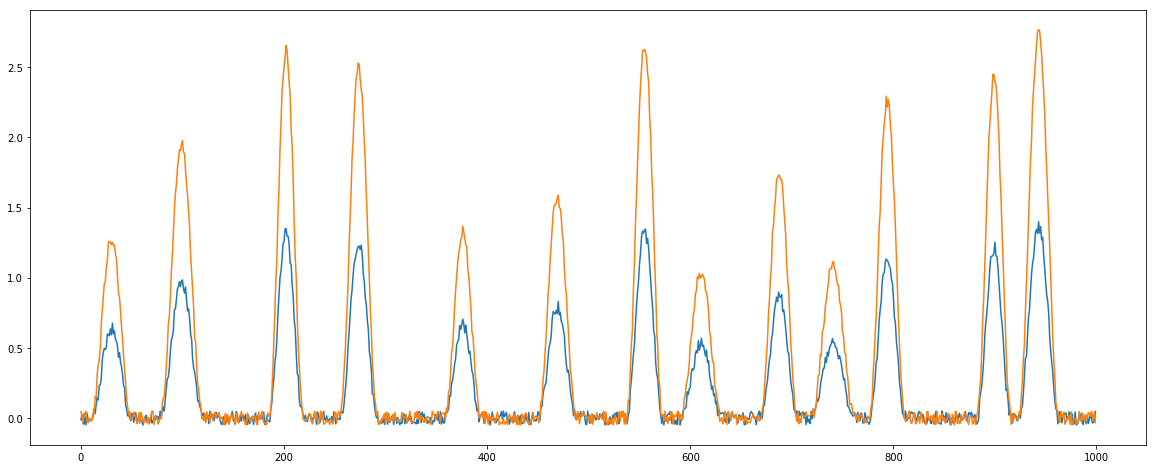

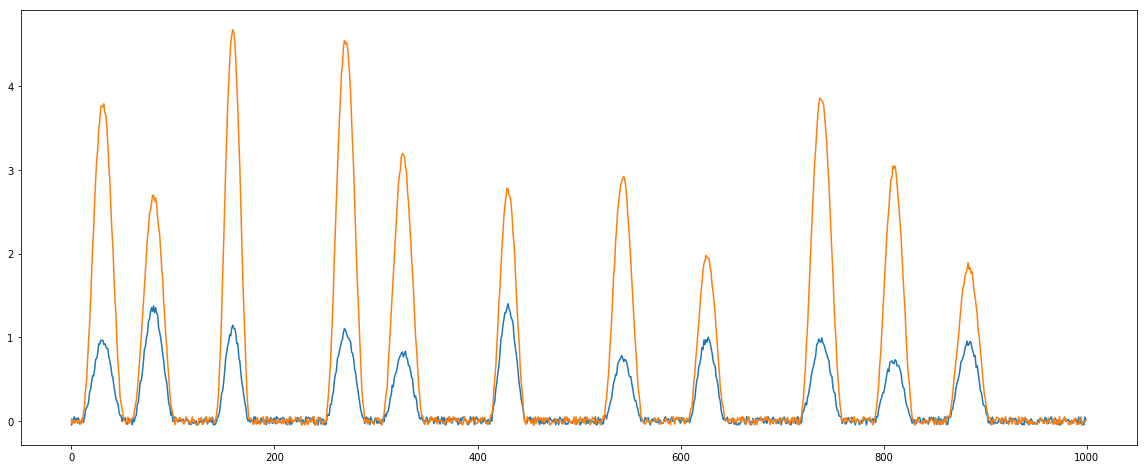

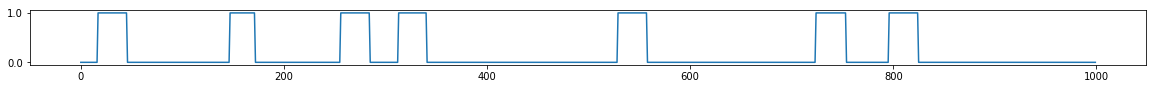

In [13]:
np.random.seed(42)
X_train, y_train = generate_clean_data(1000)
X_test, y_test = generate_clean_data(1000, anomalous=True)

plt.figure(figsize=(20, 8))
plt.plot(X_train)

plt.figure(figsize=(20, 8))
plt.plot(X_test)

plt.figure(figsize=(20, 1))
plt.yticks((0, 1), ("0.0", "1.0"))
plt.plot(y_test)


TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Test pipeline implementation

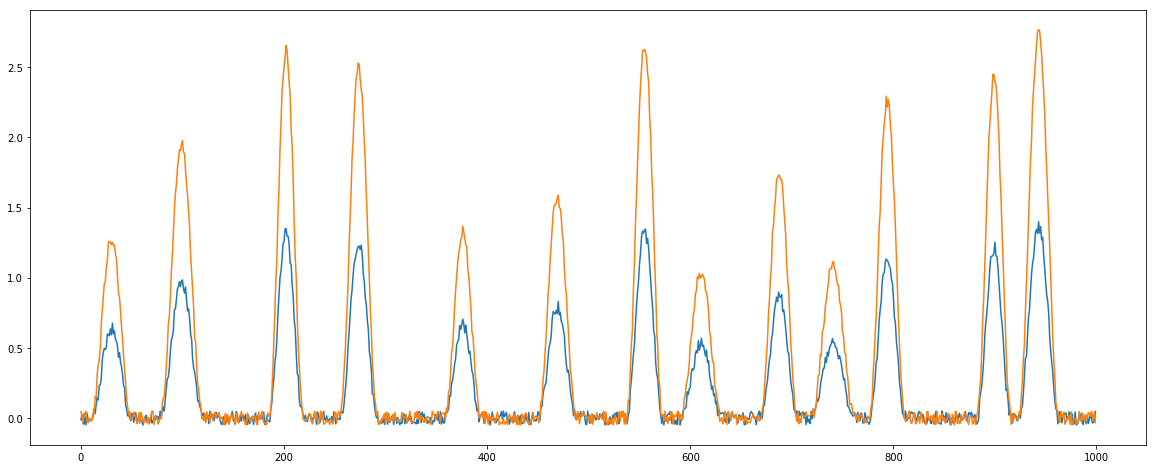

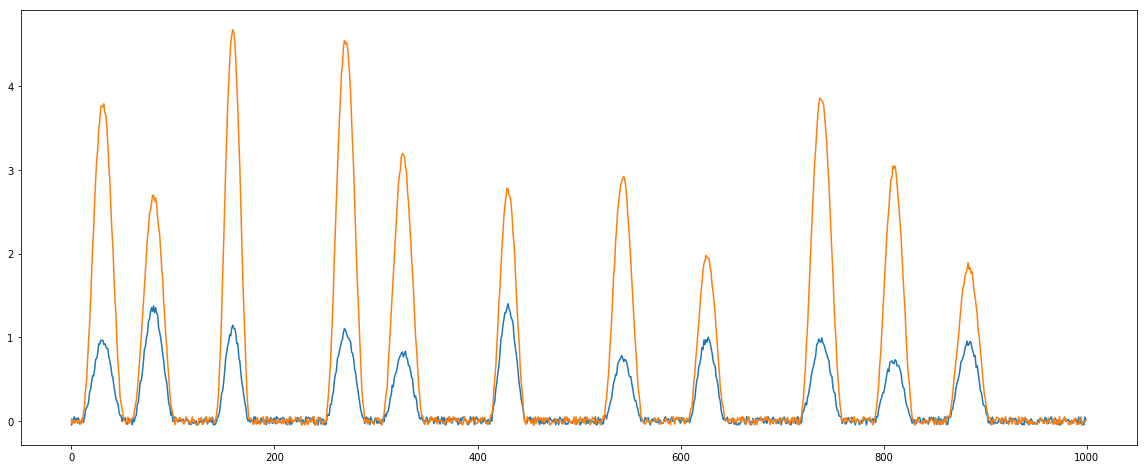

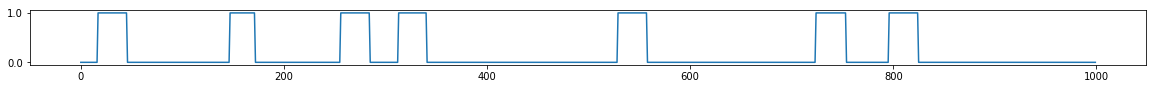

In [14]:
dataset = SyntheticMultivariateDataset()
X_train, y_train, X_test, y_test = dataset.data()

plt.figure(figsize=(20, 8))
plt.plot(X_train)

plt.figure(figsize=(20, 8))
plt.plot(X_test)

plt.figure(figsize=(20, 1))
plt.yticks((0, 1), ("0.0", "1.0"))
plt.plot(y_test)